In [1]:
#Import Packages
import urllib2,json
from bs4 import BeautifulSoup
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import socket
import httplib



# NHL API Itself -- https://github.com/dword4/nhlapi#schedule

In [ ]:
#Teams

request = urllib2.Request('https://statsapi.web.nhl.com/api/v1/teams')
response = urllib2.urlopen(request)
json_load = json.loads(response.read())
teams = json_normalize(json_load['teams'])
team_names = teams['teamName']
team_names = [w.replace(' ',"") for w in team_names]

# Get USA Today Contracts (2000-2014)

In [3]:
#Soup It
base_url = 'https://www.usatoday.com/sports/nhl/salaries/2010/player/all/'
converted_url = urllib2.urlopen(base_url)
soup = BeautifulSoup(converted_url)
soup.prettify()
Table = soup.find('table',{'class' : 'sort custom-sort ribbonfx'})

/Users/averyw/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/averyw/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


u'<!DOCTYPE html>\n<!--[if IE 8]><html class="no-js lt-ie10 lt-ie9" lang="en"><![endif]-->\n<!--[if IE 9]><html class="no-js lt-ie10" lang="en"><![endif]-->\n<!--[if gt IE 10]><!-->\n<html class="no-js" lang="en">\n <!--<![endif]-->\n <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n  <script src="https://www.gannett-cdn.com/uxstatic/usatoday/usat-web-static-3594.0/js/partner/show_ads.js" type="text/javascript">\n  </script>\n  <title>\n   NHL Salaries - NHL Hockey - USA TODAY\n  </title>\n  <meta content="text/html; charset=UTF-8" name="Content-Type"/>\n  <meta content="notranslate" name="google"/>\n  <meta content="Current NHL Salaries - NHL Hockey - USA TODAY" name="description"/>\n  <link href="https://www.usatoday.com/sports/nhl/salaries/2010/player/all/" rel="canonical"/>\n  <meta content="215046668549694" property="fb:app_id"/>\n  <meta content="6271782579,6566864515,6581478870,7197664863,7850621533,8031989578,9812439851,10482066215,11277320498,13642915529,1365235

In [147]:
#Get Salaries from USA TODAY

for i in range(2000,2019):
    year = i
    base_url = 'https://www.usatoday.com/sports/nhl/salaries/'
    end_url = '/player/all/'
    full_url = base_url + str(year) + end_url
    if 'USA_Today_Salaries' in globals():
        year_salaries = pd.read_html(full_url,attrs = {'class' : 'sort custom-sort ribbonfx'} )
        year_salaries = year_salaries[0]
        frames = [USA_Today_Salaries,year_salaries]
        USA_Today_Salaries = pd.concat(frames)
        #print 'Wendell' + str(year)
    else:
        Return = pd.read_html(full_url,attrs = {'class' : 'sort custom-sort ribbonfx'} )
        USA_Today_Salaries = Return[0]
        #print 'Avery' + str(year)

In [150]:
#Clean Up Salary Number

def clean_up(x):
    y = x.str.replace('\$ ','')
    z = y.str.replace(',','')
    z = z.astype(float)
    return z

USA_Today_Salaries[['Salary','Total Value']] = USA_Today_Salaries[['Salary','Total Value']].apply(clean_up,axis=1)

,Avg Annual,Name,POS,Salary,Team,Total Value,TotalValue,Years,rank
0,NaN,Paul Kariya,LW,1e+07,ANA,NaN,10000000.0,2000,--
1,NaN,Peter Forsberg,C,1e+07,COL,NaN,10000000.0,2000,--
2,NaN,Jaromir Jagr,RW,9.84271e+06,PIT,NaN,9842708.0,2000,--
3,NaN,Pavel Bure,RW,9e+06,FLA,NaN,9000000.0,2000,--
4,NaN,Keith Tkachuk,LW,8.3e+06,STL,NaN,8300000.0,2000,--


In [152]:
#Year Clean Up

USA_Today_Salaries['Years'] = USA_Today_Salaries['Years'].astype('str')
USA_Today_Salaries['Years'] = USA_Today_Salaries['Years'].apply(lambda x: x[(x.find('(')+1):x.find(')')])

In [153]:
#Clean up Column Names

USA_Today_Salaries.columns = USA_Today_Salaries.columns.str.replace(' ','')

# Cap Friendly from 2014-ON

In [154]:
#Get Salaries from Cap Friendly -- https://www.google.com/url?q=https://github.com/dword4/nhlapi%23schedule&sa=D&ust=1520977476120000&usg=AFQjCNEECnZhufOt10DYPdzXwNJ9eIeBww
#Get the Lay of the Land --- CONTRACTS FROM 2015 ON

base_url = 'https://www.capfriendly.com/browse/active/2015'
converted_url = urllib2.urlopen(base_url)
soup = BeautifulSoup(converted_url)
soup.prettify()
soup.findAll('table')

[<table id="brwt"><thead><tr class="column_head"><th class="left" style="width:199px;min-width:199px">PLAYER</th><th class="center">TEAM</th><th class="center" style="width:80px;min-width:80px">CLAUSE</th><th align="center">EXPIRY</th><th class="center brs_srt cp" data-srt="14">AGE</th><th class="center" style="width:70px;min-width:70px">POS</th><th class="center">Handed</th><th class="brw_s"></th><th class="center brs_srt cp" data-srt="13"><span class="q" title="Games Played">GP</span></th><th class="center brs_srt cp" data-srt="3"><span class="q" title="Goals">G</span></th><th class="center brs_srt cp" data-srt="4"><span class="q" title="Assists">A</span></th><th class="center brs_srt cp" data-srt="5"><span class="q" title="Points">P</span></th><th class="center brs_srt cp" data-srt="9"><span class="q" title="Plus/Minus">+/-</span></th><th class="center brs_srt cp" data-srt="10"><div style="margin-right:20px"><span class="q" title="Average Time on Ice">TOI</span></div></th><th class=

In [155]:
#For Loop for Salaries
del CP_AR_Total
for x in range(2015,2020):
    CP_Base_URL = 'https://www.capfriendly.com/browse/active/'
    year = int(x)
    for y in range(1,20):
        URL_End = '/caphit/all/all/all/desc/'
        URL_End_Number = y
        FULL_URL = str(CP_Base_URL) + str(x) + str(URL_End) + str(URL_End_Number)
        try:
            pd.read_html(FULL_URL,attrs = {'id' : 'brwt'},header = 0)
        except:
            print FULL_URL
            break
        else:
            if 'CP_AR_Total' in globals():
                CP_AR = pd.read_html(FULL_URL,attrs = {'id' : 'brwt'},header = 0)
                CP_AR = CP_AR[0]
                CP_AR['Year'] = int(x)
                Frames = [CP_AR_Total,CP_AR]
                CP_AR_Total = pd.concat(Frames)
            else:
                CP_AR_Total = pd.read_html(FULL_URL,attrs = {'id' : 'brwt'},header = 0)
                CP_AR_Total = CP_AR_Total[0]
                CP_AR_Total['Year'] = int(x)
    #for y in range(2006,2017):
     #   if 'CP_AR_Total' in globals():
      #      CP_FULL_URL_YEAR = CP_FULL_URL + '/' + str(y)
       #     CP_TT = pd.read_html(CP_FULL_URL_YEAR,attrs = {'class' : 'tbl brwt'},header = 0)
        #    CP_TT = CP_TT[0]
        #else:
         #   CP_FULL_URL_YEAR = CP_FULL_URL + '/' + str(y)
          #  CP_TT = pd.read_html(CP_FULL_URL_YEAR,attrs = {'class' : 'tbl fixed'},header = 0)
CP_AR_Total


https://www.capfriendly.com/browse/active/2015/caphit/all/all/all/desc/11
https://www.capfriendly.com/browse/active/2016/caphit/all/all/all/desc/13
https://www.capfriendly.com/browse/active/2017/caphit/all/all/all/desc/14
https://www.capfriendly.com/browse/active/2018/caphit/all/all/all/desc/16
https://www.capfriendly.com/browse/active/2019/caphit/all/all/all/desc/11


In [191]:
CP_AR_Total_Use = CP_AR_Total[['PLAYER','POS','Year','SALARY']]

In [192]:
#Clean Up Data

CP_AR_Total_Use.SALARY = CP_AR_Total_Use.SALARY.astype(str)
CP_AR_Total_Use['SALARY'] = CP_AR_Total_Use['SALARY'].str.replace('\$','').str.replace(',','').astype(float)
CP_AR_Total_Use['POS'] = CP_AR_Total_Use['POS'].apply(lambda x: np.where(x.find(',') > 0,x[0:x.find(',')],x))
CP_AR_Total_Use['PLAYER'] = CP_AR_Total_Use['PLAYER'].apply(lambda x: x[x.find('.')+2:])

/Users/averyw/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/averyw/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/averyw/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [193]:
CP_AR_Total_Use.head()

,PLAYER,POS,Year,SALARY
0,Alex Ovechkin,LW,2015,10000000.0
1,Evgeni Malkin,C,2015,9500000.0
2,P.K. Subban,D,2015,7000000.0
3,Sidney Crosby,C,2015,12000000.0
4,Corey Perry,RW,2015,9000000.0


# Basic Analysis

In [29]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

Topline_Stats = pysqldf('select YEARS,sum(TotalValue) as TotalValue,avg(TotalValue) as AverageRate,max(TotalValue) as MaxRate,min(TotalValue) as MinRate,count(*) as Total_Players from USA_Today_Salaries group by Years order by years')
Topline_Stats
 

,Years,POS,TotalValue,AverageRate,MaxRate,MinRate,Total_Players
0,2000,C,245468163.0,1.461120e+06,10000000.0,325000.0,168
1,2000,D,311088812.0,1.346705e+06,7680000.0,243750.0,231
2,2000,G,112278187.0,1.727357e+06,7500000.0,350000.0,65
3,2000,LW,149530701.0,1.289058e+06,10000000.0,243750.0,116
4,2000,RW,182912422.0,1.524270e+06,9842708.0,150000.0,120
5,2001,C,281257132.0,1.887632e+06,11000000.0,300000.0,149
6,2001,D,344310631.0,1.497003e+06,9500000.0,350000.0,230
7,2001,G,122806485.0,2.046775e+06,8500000.0,400000.0,60
8,2001,LW,187169286.0,1.396786e+06,10000000.0,165000.0,134
9,2001,RW,204812038.0,1.612693e+06,11000000.0,272000.0,127


In [45]:
#Pivot on Positional data
Topline_Stats_Position = pysqldf('select YEARS,POS,sum(TotalValue) as TotalValue,avg(TotalValue) as AverageRate,max(TotalValue) as MaxRate,min(TotalValue) as MinRate,count(*) as Total_Players from USA_Today_Salaries group by POS,Years order by years')

USA_Today_Salaries_Neeeded = USA_Today_Salaries[['POS','Years','TotalValue']]
#USA_Today_Salaries.pivot(index='Salesman',columns='idx')[['product','price']]
Count_and_Medians = pd.concat([pd.pivot_table(USA_Today_Salaries_Neeeded[USA_Today_Salaries_Neeeded.POS != 'F'],values='TotalValue',index='Years',columns='POS',aggfunc = np.count_nonzero)
,pd.pivot_table(USA_Today_Salaries_Neeeded[USA_Today_Salaries_Neeeded.POS != 'F'],values='TotalValue',index='Years',columns='POS',aggfunc = np.median)
], axis=1)
Count_and_Medians
#USA_Today_Salaries_Neeeded.pivot(index = 'Years',columns = 'POS',values = 'TotalValue').reset_index()

POS,C,D,G,LW,RW,C,D,G,LW,RW
Years,,,,,,,,,,
2000,168.0,231.0,65.0,116.0,120.0,862500.0,900000.0,950000.0,795000.0,968750.0
2001,149.0,230.0,60.0,134.0,127.0,1025000.0,975000.0,1190000.0,912500.0,1000000.0
2002,156.0,233.0,70.0,132.0,130.0,1192500.0,1025000.0,1100000.0,987500.0,1000000.0
2003,172.0,240.0,71.0,127.0,138.0,1150000.0,1100000.0,1200000.0,1000000.0,900000.0
2005,193.0,235.0,69.0,116.0,128.0,942400.0,942400.0,900000.0,895172.5,769025.0
2006,200.0,232.0,68.0,108.0,116.0,984200.0,1025000.0,1000000.0,912800.0,979600.0
2007,189.0,224.0,66.0,114.0,113.0,984200.0,1212500.0,1306250.0,967100.0,1200000.0
2008,173.0,232.0,70.0,116.0,130.0,1150000.0,1500000.0,975000.0,1250000.0,1050000.0
2009,164.0,225.0,68.0,117.0,127.0,1125000.0,1675000.0,1137500.0,1350000.0,1000000.0


# Vizs

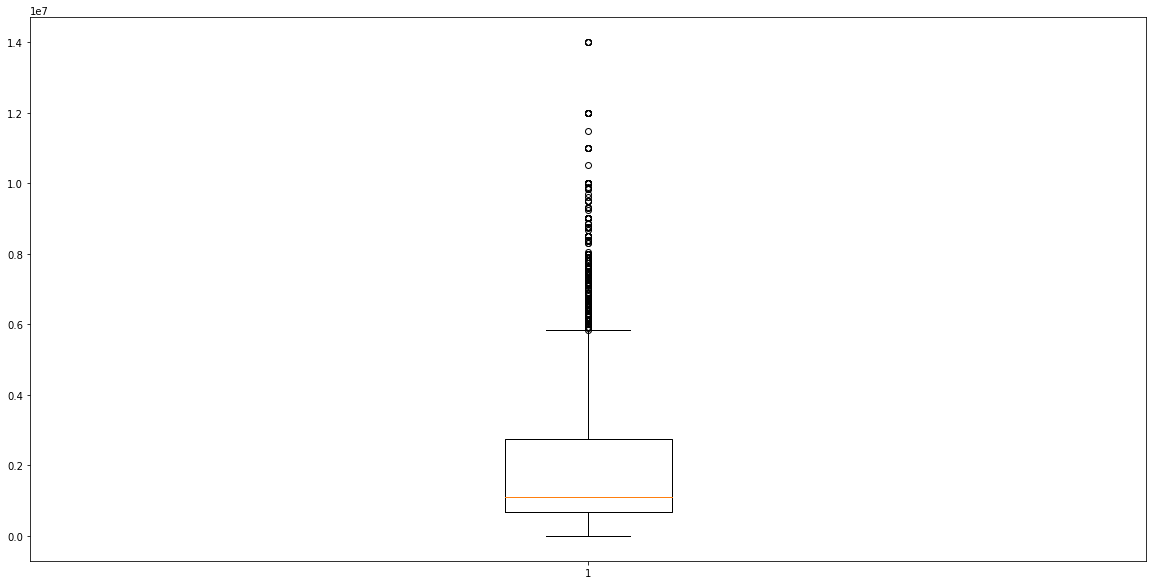

In [6]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
#Create Breakout

# Create a Figure
fig = plt.figure(figsize =(20,10))
ax1 = fig.add_subplot(111)
# Plot the data
#ax1.plot(np.repeat(1,len(USA_Today_Salaries['Total Value'])),USA_Today_Salaries['Total Value'],markers = "v")
ax1.boxplot(USA_Today_Salaries['Total Value'])
#ax2.barh([0.5,1,2.5],[0,1,2])
plt.show()

2000         Axes(0.1,0.736957;0.173913x0.163043)
2001    Axes(0.308696,0.736957;0.173913x0.163043)
2002    Axes(0.517391,0.736957;0.173913x0.163043)
2003    Axes(0.726087,0.736957;0.173913x0.163043)
2005         Axes(0.1,0.541304;0.173913x0.163043)
2006    Axes(0.308696,0.541304;0.173913x0.163043)
2007    Axes(0.517391,0.541304;0.173913x0.163043)
2008    Axes(0.726087,0.541304;0.173913x0.163043)
2009         Axes(0.1,0.345652;0.173913x0.163043)
2010    Axes(0.308696,0.345652;0.173913x0.163043)
2011    Axes(0.517391,0.345652;0.173913x0.163043)
2012    Axes(0.726087,0.345652;0.173913x0.163043)
2013             Axes(0.1,0.15;0.173913x0.163043)
2014        Axes(0.308696,0.15;0.173913x0.163043)
dtype: object

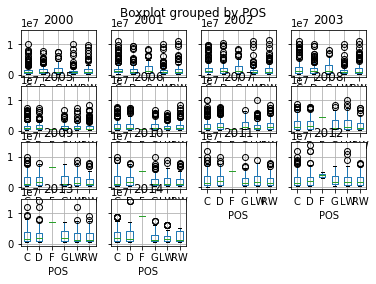

In [9]:
groups = USA_Today_Salaries.groupby(['Years'])
groups.boxplot(column = 'Total Value', by = 'POS')
#groups.all()

C          Axes(0.1,0.679412;0.363636x0.220588)
D     Axes(0.536364,0.679412;0.363636x0.220588)
F          Axes(0.1,0.414706;0.363636x0.220588)
G     Axes(0.536364,0.414706;0.363636x0.220588)
LW             Axes(0.1,0.15;0.363636x0.220588)
RW        Axes(0.536364,0.15;0.363636x0.220588)
dtype: object

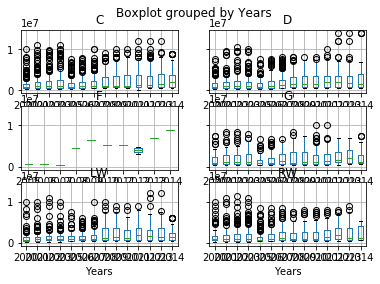

In [10]:
groups = USA_Today_Salaries.groupby(['POS'])
groups.boxplot(column = 'Total Value', by = 'Years')

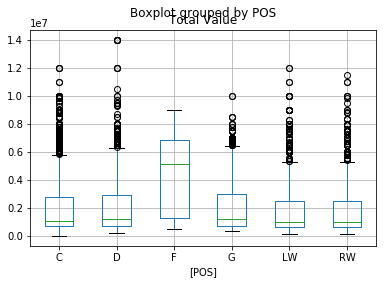

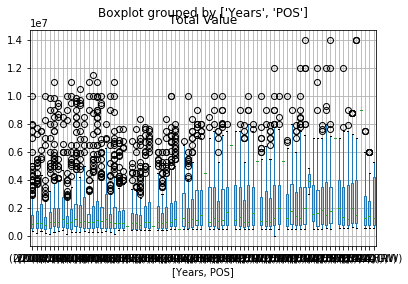

In [11]:
#Plot by Position
USA_Today_Salaries.boxplot(column='Total Value',by = ['POS'])
USA_Today_Salaries.boxplot(column='Total Value',by = ['Years','POS'])
#ax1.boxplot(USA_Today_Salaries['Total Value'])


In [ ]:
USA_Today_Salaries.head(5)

# Cap Friendly

In [48]:
#Get Salaries from Cap Friendly -- https://www.google.com/url?q=https://github.com/dword4/nhlapi%23schedule&sa=D&ust=1520977476120000&usg=AFQjCNEECnZhufOt10DYPdzXwNJ9eIeBww
#Get the Lay of the Land --- CONTRACTS FROM 2015 ON

base_url = 'https://www.capfriendly.com/teams/Islanders/2006'
converted_url = urllib2.urlopen(base_url)
soup = BeautifulSoup(converted_url)
soup.prettify()
soup.findAll('table')

[<table class="tbl fixed"><tbody id="table_active"><tr class="column_head"><td align="left" style="width:140px">ACTIVE ROSTER</td><td align="center" style="width:80px">TYPE</td><td align="center" style="width:80px">CAP HIT</td><td align="center" style="width:80px">BURIED HIT</td><td class="p0"></td><td align="center" style="width:30px">NHL</td><td align="center" class="q" style="width:25px" title="Injured Reserve">IR</td><td align="center" class="q" style="width:30px" title="Long-Term Injured Reserve and LTIR Conditioning Loan">LTIR</td><td align="center" class="q" style="width:50px" title="Season-Opening Injured Reserve. As explained in the FAQ, the cap hit from SOIR is different than the players actual cap hit. The sum of the cap hit from SOIR can be found in the table below">SOIR <img alt="Tooltip" height="13" onerror="this.src='https://capfriendly-wlb8ng5.stackpathdns.com/assets/images/icons/general/q2.png';this.onerror=null;" src="https://capfriendly-wlb8ng5.stackpathdns.com/asset

In [ ]:
#For Loop for Salaries

for x in range(len(team_names)):
    team = team_names[x]
    CP_Base_URL = 'https://www.capfriendly.com/teams/'
    CP_FULL_URL = CP_Base_URL + team
    for y in range(2006,2017):
        if 'CP_AR_Total' in globals():
            CP_FULL_URL_YEAR = CP_FULL_URL + '/' + str(y)
            CP_TT = pd.read_html(CP_FULL_URL_YEAR,attrs = {'class' : 'tbl fixed'},header = 0)
            CP_TT = CP_TT[0]
            #CP_TT['year'] = y
            NRIndex = CP_TT.index.values[CP_TT['ACTIVE ROSTER'] == 'NON-ROSTER']
            NRIndex = NRIndex[0]
            CP_AR = CP_TT[CP_TT.index < NRIndex]
            CP_AR['type'] = 'active'
            CP_AR['year'] = y
            CP_NR = CP_TT[CP_TT.index >= NRIndex]
            CP_NR.reset_index(inplace = True,drop=True)
            CP_NR.columns = CP_NR.iloc[0]
            CP_NR.drop(0,inplace = True)
            CP_NR.reset_index(inplace = True,drop=True)
            CP_NR['type'] = 'NR'
            CP_NR['year'] = y
            AR_Frames = [CP_AR_Total,CP_AR]
            CP_AR_Total = pd.concat(AR_Frames)
            NR_Frames = [CP_NR_Total,CP_NR]
            CP_NR_Total = pd.concat(NR_Frames)
        else:
            CP_FULL_URL_YEAR = CP_FULL_URL + '/' + str(y)
            CP_TT = pd.read_html(CP_FULL_URL_YEAR,attrs = {'class' : 'tbl fixed'},header = 0)
            CP_TT = CP_TT[0]
            #CP_TT['year'] = y
            NRIndex = CP_TT.index.values[CP_TT['ACTIVE ROSTER'] == 'NON-ROSTER']
            NRIndex = NRIndex[0]
            CP_AR = CP_TT[CP_TT.index < NRIndex]
            CP_AR['type'] = 'active'
            CP_AR['year'] = y
            CP_NR = CP_TT[CP_TT.index >= NRIndex]
            CP_NR.reset_index(inplace = True,drop=True)
            CP_NR.columns = CP_NR.iloc[0]
            CP_NR.drop(0,inplace = True)
            CP_NR.reset_index(inplace = True,drop=True)
            CP_NR['type'] = 'NR'
            CP_NR['year'] = y
            CP_AR_Total = CP_AR
            CP_NR_Total = CP_NR

In [ ]:
CP_FULL_URL_YEAR

In [ ]:
#######Get Cap Friendly Data


CP_TT = pd.read_html(base_url,attrs = {'class' : 'tbl fixed'},header = 0)
CP_TT = CP_TT[0]
NON-ROSTER

In [ ]:
#CP_TT['ACTIVE ROSTER']
NRIndex = CP_TT.index.values[CP_TT['ACTIVE ROSTER'] == 'NON-ROSTER']
NRIndex = NRIndex[0]
CP_AR = CP_TT[CP_TT.index < NRIndex]
CP_NR = CP_TT[CP_TT.index >= NRIndex]
CP_NR.reset_index(inplace = True,drop=True)
CP_NR.columns = CP_NR.iloc[0]
CP_NR.drop(0,inplace = True)
CP_NR.reset_index(inplace = True,drop=True)